In [2]:
# -*- encoding: utf-8 -*-
'''
@File : Fig2-9_China_Monthly_Pos.ipynb
@AU.  : Gulin Ran 
@Mail : gulinr@whu.edu.cn 
@VER  : 1.0
@Time : 2023/05/11 19:11:01
@LIC  : Licensed under the MIT license
@Desc : None
'''

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER,LONGITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from pytesmo.time_series import anomaly as pyan
from collections import Counter
import sys
from matplotlib.lines import Line2D
from cartopy.io.shapereader import Reader, natural_earth
import numpy as np
from cartopy.feature import ShapelyFeature
from matplotlib.font_manager import FontProperties

cn_font = FontProperties(fname=r"c:\windows\fonts\SimHei.ttf", size=20)

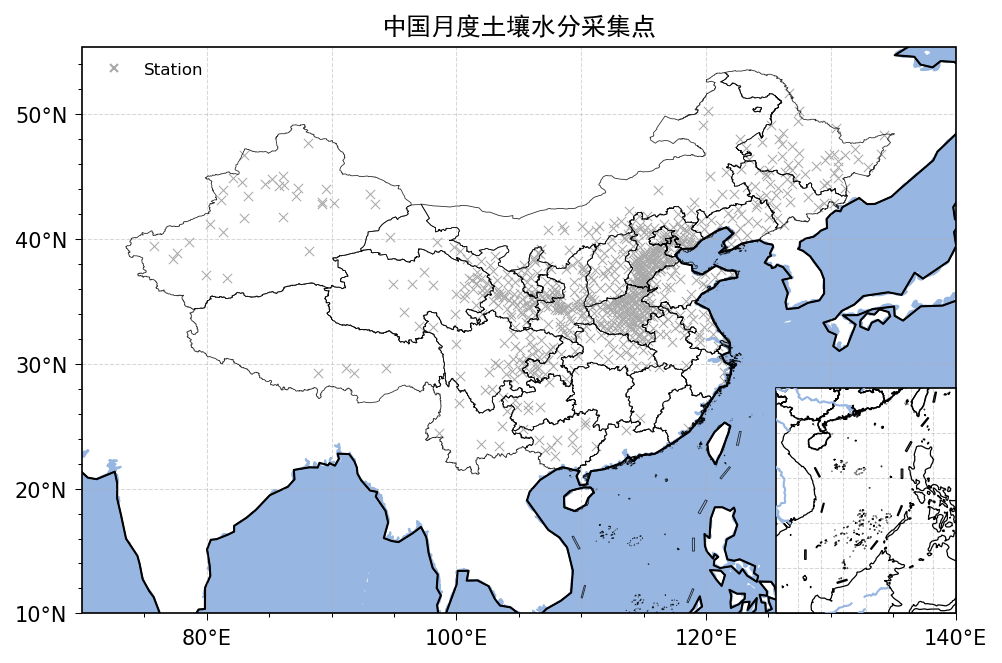

In [13]:
fig = plt.figure(figsize=(10,5),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
df = pd.read_csv(r'I:\rgreen_soil_moisture_master_degree\plt_data\china_ee.csv')

# ax = plt.axes(projection=ccrs.Robinson())
# ax.set_extent([-130, -60, 19, 46])
ax.coastlines(resolution='110m',color='black')
# ax.set_global()
ax.set_extent([70, 140, 10, 50])
ax.add_feature(cfeature.OCEAN, edgecolor='black',color = cfeature.COLORS['water'])
ax.set_yticks(np.arange(10,51,10), crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
ax.set_xticks(np.arange(80,141,20), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
ax.tick_params(which='both', labelsize=10, width=0.5)
ax.minorticks_on()
title = '中国月度土壤水分采集点'
ax.set_title(f'{title}', fontsize=12,fontproperties=cn_font)
dummy_scatter = Line2D([0], [0], linestyle='none', marker='x', color='#a9a9a9', markersize=7)
provinces = cfeature.ShapelyFeature(
    Reader(r'I:\rgreen_soil_moisture_master_degree\plt_data\shp_file\China_Newest_Bond.shp').geometries(),
    ccrs.PlateCarree(), edgecolor='k',
    facecolor='none'
)
ax.add_feature(provinces, linewidth=0.4, zorder=2,edgecolor = 'black',alpha=0.8)
ax.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=10)

plt.legend([dummy_scatter], ['Station'],loc='upper left',
           fontsize=8,
           markerscale=.5,
           frameon=False)


plt.scatter(x=df['longitude'].tolist(),
            y=df['latitude'].tolist(),
            color = '#a9a9a9',
            # c=df2['Color'].tolist(),
            s=20,
            edgecolors='black',
            alpha=1,
            linewidths=0.5,
            transform=ccrs.PlateCarree(),
            marker='x',
            cmap='gnuplot2',)
ax.gridlines(draw_labels=False,
             crs=ccrs.PlateCarree(),
             linewidth=0.5,
             linestyle='--',
             alpha=0.5,)
left, bottom, width, height = 0.644, 0.125, 0.2, 0.3
ax2 = fig.add_axes(
    [left, bottom, width, height], 
    projection=ccrs.PlateCarree()
)
ax2.set_extent([105, 125, 0, 25])
ax2.add_feature(provinces, linewidth=0.6, zorder=2)
ax2.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6, zorder=10)  # 加载分辨率为50的海岸线
ax2.add_feature(cfeature.RIVERS.with_scale('50m'), zorder=10)  # 加载分辨率为50的河流
ax2.add_feature(cfeature.LAKES.with_scale('50m'), zorder=10)  # 加载分辨率为50的湖泊
# # ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m',
# #                                         edgecolor='face',
# #                                         facecolor=cfeature.COLORS['land']))
# # plt.legend(numpoints=1,ncol=6,loc=0,title='ISMN Network')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.gridlines(draw_labels=False,
             crs=ccrs.PlateCarree(),
             linewidth=0.5,
             linestyle='--',
             alpha=0.5,)
# ax.stock_img()
# ax2.stock_img()
fig.savefig(os.path.join(r'D:\cn_plot', 'Fig2-9.jpg'), dpi=300)
# plt.savefig(os.path.join(folder_output, 'statiob.png'), dpi=300)